# Aprendiendo Machine Learning con Python 

## Scikit learn

`Scikit_learn` es una librería de Python de aprendizaje automático de código abierto que admite el aprendizaje supervisado y no supervisado. Proporciona modelos y algoritmos que se han implementado con una arquitectura orientada a objetos, donde cada modelo tiene su propia clase. [Documentación](https://scikit-learn.org/stable/index.html)

Para empezar a importar los algoritmos, importe los módulos correspondientes, no la librería en general, de lo contrario cuando llame algún método no funcionará.  

`import from sklearn.linear_model import LinearRegression`

Para crear un modelo, generamos un objeto de la clase correspondiente a este modelo. 

`modelo = LinearRegression()` ---> object = modelo(parámetros)

## ¿Cómo elegir el algoritmo a utilizar?

Ésta podría ser la parte más dificil, encontrar el estimador adecuado para el trabajo. En el siguiente mapa, encontraremos buenos estimadores para cada aplicación.
![Mapa](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/codigo/ml_map.png)
[Fuente](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


## Construyendo el modelo
Para desarrollar cualquier modelo, se usan estos métodos, los cuales lo heredan todas las clases. 

1. Definir el modelo. `modelo = LinearRegresion()`     

2. Ajustar, es decir, capturar patrones a partir de los datos proporcionados `modelo.fit(X,y)`
 
    - La matriz de entrada `X`, está formada por las muestras que se representan como filas y las características representadas como columnas.
    - Los valores objetivo `y` son números reales para tareas de regresión, o enteros para clasificación (o cualquier otro conjunto discreto de valores). 

3. Evaluar qué tan precisas son las predicciones del modelo. `modelo.score(X,y)`    
    
4. Predecir los valores objetivo de nuevos datos. No es necesario volver a entrenar al estimador. `modelo.predict(X)`
 
___

En principio, importemos las librerías y los DataFrames con las que vamos a trabajar.

**Recordemos el ejercicio** - Predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. [Fuente](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv)

Estos DataFrames fueron tratados en el Notebook [preparacion_datos](https://github.com/bonaldee/ProyectoModelado_ElianaBonalde/blob/main/preparacion_datos.ipynb).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

#libraría utilizada en todos los métodos
from sklearn.metrics import mean_absolute_error #validar

X = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entrenamiento.csv')
y = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_entren_prediccion.csv')
X_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test.csv')
y_test = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df_test_prediccion.csv')
df = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/Cardio/df.csv')
df.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,67.0,0,1,0,228.69,36.6,0,1
1,2,0,80.0,0,1,1,105.92,32.5,1,1
2,3,1,49.0,0,0,0,171.23,34.4,2,1
3,4,1,79.0,1,0,1,174.12,24.0,1,1
4,5,0,81.0,0,0,0,186.21,29.0,0,1


Con este ejercicio, vamos a utilizar algunos de los principales algoritmos usados en Machine Learning, sin tomar en cuenta si es el más apropiado o no, el objetivo es compararlos e identificar el que mejor resultado obtiene al predecir si el paciente sufre o no un ataque cerebrovascular.
___

## Algoritmos de Árbol de decisión

Los árboles de desición son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable objetivo. 

Se utilizan sobre todo para clasificación de información, bifurcando y modelando los posibles caminos tomados y su probabilidad de ocurrencia para mejorar su precisión. El primer nodo se llama raíz, luego se descompone en ramas que se subdividen hasta llegar a las hojas que son los nodos finales. En particular, buscará la mejor ruta, balanceando la posibilidad de ocurrencia y su importancia en cada rama y hojas para clasificar un resultado.

___
### Árbol de clasificación - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Subtipo de árboles de decisión que se aplica cuando la variable objetivo es categórica.

In [23]:
from sklearn import tree
from sklearn.model_selection import cross_validate
mo_DTC =  tree. DecisionTreeClassifier(splitter='best', max_depth=3, min_samples_split=2, random_state=0) #Definimos el modelo.
mo_DTC = mo_DTC.fit(X, y) #Ajustamos el modelo

Los parámetros utlizados en este modelo fueron:

- `splitter`: La estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son  **best** para elegir la mejor división y **random** para elegir la mejor división aleatoria. Por defecto es **best**.
- `max_depth`: La profundidad máxima del árbol. Para obtener un comportamiento determinista durante el ajuste, debe fijarse a un número entero. 
- `min_sample_split`: Número mínimo de muestras necesarias para dividir un nodo interno. Por defecto es 2. 
- `random_state`: Controla la aleatoriedad del estimador. 

Una vez seleccionado y entrenado el modelo con los datos de entrenamiento, podemos predecir la variable objetivo con el conjunto de prueba. Para mayor comodidad, lo visualizamos como un DataFrame. 

In [40]:
predic_DTC = mo_DTC.predict(X_test)
DTC_df = pd.DataFrame(predic_DTC)
DTC_df.head(4)

,0,1
0,3,1
1,39,1
2,2,1
3,3,1


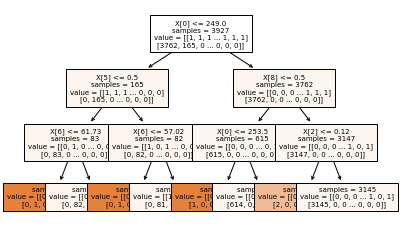

In [25]:
decision_tree = tree.plot_tree(
    decision_tree = mo_DTC,
    #feature_names = labels.tolist(),
    class_names = 'stroke',
    filled = True,
    impurity = False,
    fontsize = 7) 

In [28]:
#print(mo_DTC.score(y_test, predic_DTC))

In [55]:
error = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predic_DTC,
        )
error

1191.2372708757637

### Árbol de regresión - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

Subtipo de árboles de decisión que se aplica cuando la variable objetivo es continua.

In [7]:
mo_DTR = tree.DecisionTreeRegressor(random_state=1) 
mo_DTR.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [36]:
predic_DTR = mo_DTR.predict(X_test)
DTR_df = pd.DataFrame(predic_DTR)
DTR_df.head()

,0,1
0,3.0,1.0
1,10.0,1.0
2,24.0,1.0
3,28.0,1.0
4,33.0,1.0


In [9]:
print(mo_DTR.score(X_test, y_test))

0.9881018109464292


In [56]:
error_DTR = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predic_DTR,
        )
error_DTR

1.0519348268839104

Para tener una idea del rendimiento futuro de nuestro modelo, debemos probarlo en los datos del conjunto de prueba, es decir, datos que el modelo nunca ha visto.

Este modelo es capaz de predecir correctamente un 98% aproximadamente de las observaciones del conjusto de prueba. Para afirmar que es un buen modelo, la puntuación debería estar entre 91 y 99%, aproximadamente.

Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden resultar en la generación de un árbol completamente diferente. Además, te dejan con una decisión difícil, un árbol profundo con muchas hojas tiene mucha varianza, pero se ajustan mucho a los datos de entrenamiento, y es aquí donde vemos el sobreajuste porque cada predicción proviene de datos históricos de solo algunos datos en su hoja. Ahora bien, un árbol poco profundo con pocas hojas, tiene poca varianza, pero no consiguen representar la relaciones entre las variables, por lo tanto, tendrá un desempeño deficiente porque no logra capturar tantas distinciones en los datos brutos.

Este método sufre el problema de equilibrio entre sesgo y varianza, esto se soluciona con los métodos de ensamble, los cuales buscan equilibrar. 
___
### Random Forest 

Un modelo Random Forest es un tipo de ensamble en Machine Learning combinando un conjunto de árboles de decisión individuales, donde la predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Al igual que los los árboles de decisión, los bosques tienen dos subtipos: [clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) y [regresión](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).  

In [31]:
from sklearn.ensemble import RandomForestClassifier #ramdom forest
mo_RF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
mo_RF.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=0)

Además de los parámetros utilizados en arboles de decisión, usamos `n_estimators`, el cual configura el número de árboles en el bosque. Cuanto más grande, mejor, pero también más tiempo se tardará en calcular. El Valor por defecto es 100.

In [47]:
predic_RF = mo_RF.predict(X_test)
RF_df= pd.DataFrame(predic_RF)
RF_df.head()

,0,1
0,42,1
1,109,1
2,40,1
3,44,0
4,88,1


In [35]:
#print(mo_RF.score(X_test, y_test))

In [57]:
error_RF = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predic_RF,
        )
error_RF

789.6216904276986

## Algoritmos basados en Instancia

### Nearest Neighbors 

La idea general de los métodos de Nearest Neighbors es encontrar un número predefinido de muestras de entrenamiento más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean.

El aprendizaje basado en vecinos supervisados se clasifica en: 
- Clasificación, se usa para datos con etiquetas discretas.

    - KNeighborsClassifier, el número de muestras puede ser una constante definida por el usuario - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).
    - RadiusNeighborsClassifier, el número de muestra varia según la densidad local de puntos - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier).
 
- Regresión, usado para datos con etiquetas continuas.

    - KNeighborsRegressor - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
    
    - RadiusNeighborsRegressor - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

 
KNeighbors es la técnica más utilizada. La elección óptima del valor depende en gran medida de los datos, en general, un valor mayor suprime los efectos del ruido, pero hace que los límites de clasificación sean menos distintos. En los casos en los que los datos no se muestrean de manera uniforme, RadiusNeighbors puede ser una mejor opción.

En resumen:

- Calcula la distancia entre el item a clasificar y el resto.
- Seleccionar los k elementos más cercanos.
- Los de una clase que dominen será su clasificación final.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
#mo_KN = KNeighborsClassifier(n_neighbors=5) 
mo_KN = KNeighborsRegressor(n_neighbors=5)
mo_KN.fit(X, y)

KNeighborsRegressor()

El parámetro utlizado en este modelo fue: `n_neighbors`, el cual configura el número de vecinos que se utilizarán para las consultas.

In [53]:
predic_KN = mo_KN.predict(X_test)
KN_df= pd.DataFrame(predic_KN)
KN_df.head()

,0,1
0,19.4,1.0
1,25.6,1.0
2,18.8,1.0
3,29.0,1.0
4,27.2,1.0


In [52]:
print(mo_KN.score(X_test, y_test))

0.9885697974541406


In [54]:
error_KN = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predic_KN,
        )
error_KN

2.343380855397148